<a href="https://colab.research.google.com/github/Aswin-1121/ICT-DSA/blob/main/Aswin_regression_assig.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Load the data

In [2]:
car = pd.read_csv('/content/car_age_price.csv')
car.head()

,Year,Price
0,2018,465000
1,2019,755000
2,2019,700000
3,2018,465000
4,2018,465000


In [3]:
car.shape

(112, 2)

In [4]:
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112 entries, 0 to 111
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   Year    112 non-null    int64
 1   Price   112 non-null    int64
dtypes: int64(2)
memory usage: 1.9 KB


In [5]:
car.describe()

,Year,Price
count,112.000000,112.000000
mean,2016.669643,483866.044643
std,1.629616,91217.450533
min,2013.000000,300000.000000
25%,2015.000000,423750.000000
50%,2017.000000,500000.000000
75%,2017.000000,550000.000000
max,2020.000000,755000.000000


Find the best linear relationship between year and price

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error

In [7]:
X = car['Year']
y = car['Price']

In [8]:
y.shape

(112,)

In [9]:
y = np.array(y)
y=y.reshape(-1,1)

In [10]:
y.shape

(112, 1)

In [11]:
X.shape

(112,)

In [12]:
X = np.array(X)
X=X.reshape(-1,1)

In [13]:
X.shape

(112, 1)

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

In [15]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(67, 1) (45, 1) (67, 1) (45, 1)


In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

In [17]:
y_pred = model.predict(X_test)

In [18]:
y_pred

array([[602957.78918524],
       [506866.98063573],
       [554912.38491049],
       [554912.38491049],
       [554912.38491049],
       [410776.17208622],
       [506866.98063573],
       [554912.38491049],
       [602957.78918524],
       [602957.78918524],
       [314685.36353673],
       [506866.98063573],
       [410776.17208622],
       [651003.19346   ],
       [554912.38491049],
       [602957.78918524],
       [314685.36353673],
       [410776.17208622],
       [506866.98063573],
       [506866.98063573],
       [506866.98063573],
       [506866.98063573],
       [506866.98063573],
       [506866.98063573],
       [506866.98063573],
       [506866.98063573],
       [410776.17208622],
       [410776.17208622],
       [362730.76781148],
       [410776.17208622],
       [506866.98063573],
       [602957.78918524],
       [554912.38491049],
       [506866.98063573],
       [506866.98063573],
       [362730.76781148],
       [410776.17208622],
       [506866.98063573],
       [4107

In [19]:
print("R-squared:", r2_score(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print('Mean Absolute Error: ',mean_absolute_error(y_test,y_pred))

R-squared: 0.4811009080887487
Mean Squared Error: 3880539484.5355864
Mean Absolute Error:  51273.05317663418


In [20]:
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [[48045.40427475]]
Intercept: [-96400713.4415418]


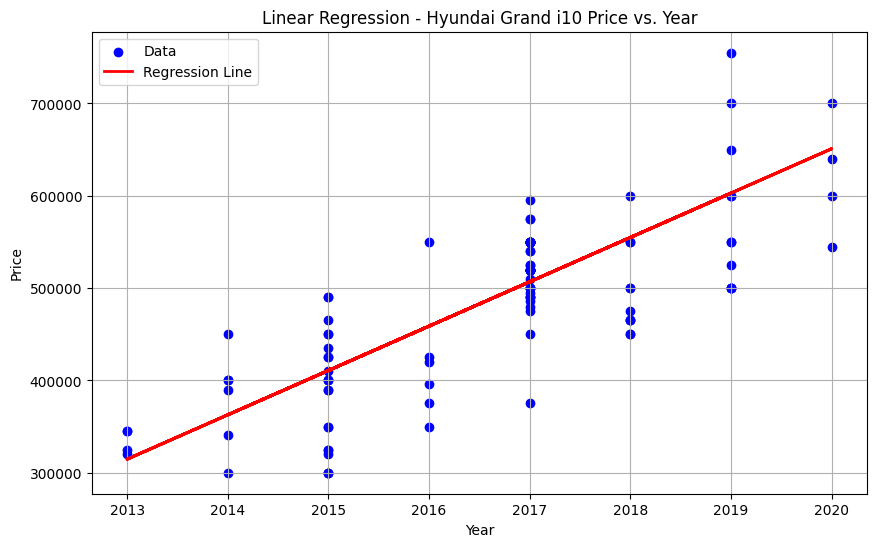

In [21]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Data')  # Plot the data points
plt.plot(X, model.predict(X), color='red', linewidth=2, label='Regression Line')  # Plot the regression line
plt.title('Linear Regression - Hyundai Grand i10 Price vs. Year')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

Can you predict the possible price of a 2022 model second-hand grand i10?

In [22]:
year_2022 = np.array([[2022]])  # Convert the year to a 2D array
predicted_price_2022 = model.predict(year_2022)

print("Predicted price of the car for the year 2022:", predicted_price_2022[0])

Predicted price of the car for the year 2022: [747094.0020095]


Please learn about lasso regression and create a model along with linearregression. Find out which one is performing better.

In [23]:
from sklearn.linear_model import Lasso

In [24]:
# Lasso Regression
lasso_model = Lasso(alpha=0.9)  # alpha as needed
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)

In [25]:
lasso_r2 = r2_score(y_test, lasso_y_pred)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)

In [26]:
print("Lasso Regression R-squared:", lasso_r2)
print("Lasso Regression Mean Squared Error:", lasso_mse)

Lasso Regression R-squared: 0.48110392548345615
Lasso Regression Mean Squared Error: 3880516919.2247486


In [ ]:
# Here dataset is small it is the reason why there is no difference between both the regressions

Using cross validation to evaluate both models for a more robust comparison

In [28]:
from sklearn.model_selection import cross_val_score

In [30]:
linear_scores = cross_val_score(model, X, y, cv=5)
lasso_scores = cross_val_score(lasso_model, X, y, cv=5)
print("Linear Regression Cross-validated R-squared scores:", linear_scores)
print("Lasso Regression Cross-validated R-squared scores:", lasso_scores)

Linear Regression Cross-validated R-squared scores: [ 0.33664615 -0.66233922  0.44566198  0.49174609  0.69592788]
Lasso Regression Cross-validated R-squared scores: [ 0.3366473  -0.66233395  0.44566752  0.49174039  0.6959253 ]
